In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cmplt

import sys
sys.path.insert(0, '../../opticalforces')

from beam import VectorialFrozenWave
from particle import SphericalParticle

fig_num = 0

In [2]:
L = 50e-3

def lip_const_func(z):
    return 1 if abs(z) < 0.1*L else 0
    
vfw = VectorialFrozenWave(centered=True)
vfw.vacuum_wavelength = 1064e-9
vfw.medium_refractive_index = 1.33
vfw.N = 25
vfw.L = L
vfw.Q = 0.9994*vfw.wavenumber
vfw.reference_function = lip_const_func

/home/arantespp/.local/lib/python3.5/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


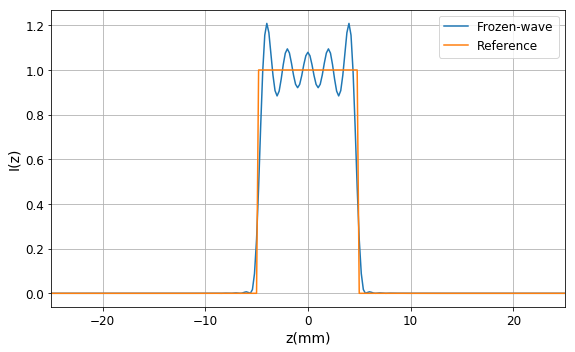

In [3]:
z = np.linspace(-L/2, L/2, 251)

fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

plt.plot([z*1e3 for z in z], [vfw.intensity(0, 0, z) for z in z], label='Frozen-wave')
plt.plot([z*1e3 for z in z], [vfw.reference_function(z)**2 for z in z], label='Reference')
plt.legend(fontsize=12, loc=1)
plt.xlim([-L/2*1e3, L/2*1e3])
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-perfil-2D.png')
plt.show()

In [ ]:
# LIP Frozen Wave longitudinal forces
fig_num += 1
plt.figure(fig_num, figsize=(5*1.618, 5))

emtdata = pd.read_csv('EMTheoryData.csv', index_col=0)
factor = 11.1

ptc = SphericalParticle()
ptc.radius = 20e-6
ptc.medium_refractive_index = 1.33

beam_pos = (0, 0, 0)

paramx = {'param': 'beam_pos_z',
          'start': -5*L/10,
          'stop': 5*L/10,
          'num': 40,}

ptc.refractive_index = 1.2*1.33
X1, F1 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X1, [1*f for f in F1], label=label)
plt.plot(emtdata.index, [data*factor for data in emtdata['120']][::-1])

ptc.refractive_index = 1.01*1.33
X2, F2 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X2, [100*f for f in F2], label=label)
plt.plot(emtdata.index, [data*factor*100 for data in emtdata['101']][::-1])

ptc.refractive_index = 0.95*1.33
X3, F3 = ptc.geo_opt_force(vfw, beam_pos, force_dir='fz', paramx=paramx)
label = r'n$_{rel}$: %.2f' % (ptc.refractive_index/1.33)
plt.plot(X3, [10*f for f in F3], label=label)
plt.plot(emtdata.index, [data*factor*10 for data in emtdata['095']][::-1])

#plt.xlim([-0.2*L, 0.2*L])

xlocs, xlabs = plt.xticks()
plt.xticks(xlocs, [xl*1e3 for xl in xlocs])

plt.legend(fontsize=12, loc=1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.xlabel(r'z(mm)', fontsize=14)
plt.ylabel('I(z)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.savefig('LIP-const-longit-forces.png')

plt.show()

1/65
start: 17 Jul 2017 11:43:56
time: 9.183075904846191

2/65
start: 17 Jul 2017 11:44:05
time: 7.843952417373657

3/65
start: 17 Jul 2017 11:44:13
time: 7.732266426086426

4/65
start: 17 Jul 2017 11:44:20
time: 7.317774295806885

5/65
start: 17 Jul 2017 11:44:28
time: 16.838775634765625

6/65
start: 17 Jul 2017 11:44:45
time: 8.009496927261353

7/65
start: 17 Jul 2017 11:44:53
time: 7.646231174468994

8/65
start: 17 Jul 2017 11:45:00
time: 17.602888822555542

9/65
start: 17 Jul 2017 11:45:18
time: 13.591466903686523

10/65
start: 17 Jul 2017 11:45:31
time: 13.728720426559448

11/65
start: 17 Jul 2017 11:45:45
time: 7.231042385101318

12/65
start: 17 Jul 2017 11:45:52
time: 7.449297666549683

13/65
start: 17 Jul 2017 11:46:00
time: 11.585581541061401

14/65
start: 17 Jul 2017 11:46:11
time: 7.564590692520142

15/65
start: 17 Jul 2017 11:46:19
time: 6.917132377624512

16/65
start: 17 Jul 2017 11:46:26
time: 19.293411254882812

17/65
start: 17 Jul 2017 11:46:45
time: 15.966102838516235
